In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

# To load the data
df = pd.read_csv('owid-covid-data.csv')

In [2]:
# Exploring the dataset
print("Columns in the dataset:")
df.columns

Columns in the dataset:


Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [3]:
# Preview rows:
print("\nFirst few rows:")
df.head()


First few rows:


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [4]:
#Identify missing values:
print("\n")
print("Missing values summary:\n")
df.isnull().sum()



Missing values summary:



iso_code                                        0
continent                                   16665
location                                        0
date                                            0
total_cases                                 37997
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       337901
excess_mortality_cumulative                337901
excess_mortality                           337901
excess_mortality_cumulative_per_million    337901
Length: 67, dtype: int64

In [5]:
#Filter for countries of interest
countries = ['Kenya','USA','India']
df = df[df['location'].isin(countries)]

In [6]:
#Drop rows with missing critical values or dates
df = df.dropna(subset=['date', 'location', 'total_cases'])

In [7]:
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

In [8]:
#Interpolate numeric columns
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].interpolate(method='linear')

In [9]:
# Preview cleaned data
print(df.head())

       iso_code continent location       date  total_cases  new_cases  \
139800      IND      Asia    India 2020-01-30          1.0        1.0   
139801      IND      Asia    India 2020-01-31          5.0        4.0   
139802      IND      Asia    India 2020-02-01          5.0        0.0   
139803      IND      Asia    India 2020-02-02          2.0        0.5   
139804      IND      Asia    India 2020-02-03          3.0        1.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
139800              0.1430           NaN         0.0                  0.0   
139801              0.7140           NaN         0.0                  0.0   
139802              0.7140           NaN         0.0                  0.0   
139803              0.7855           NaN         0.0                  0.0   
139804              0.8570           NaN         0.0                  0.0   

        ...  male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
139800  ...      

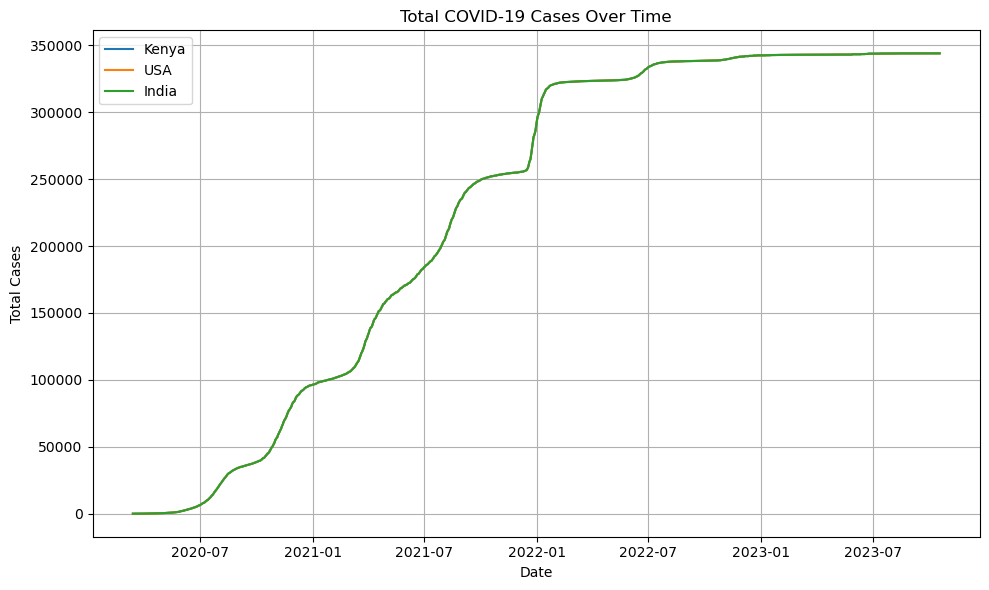

In [10]:
# Exploratory Data Analysis (EDA)
# Plot total cases over time
plt.figure(figsize=(10, 6))
for country in countries:
    subset = df[df['location'] == 'Kenya']
    plt.plot(subset['date'], subset['total_cases'], label=country)
plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Generating plot: Total Deaths Over Time...


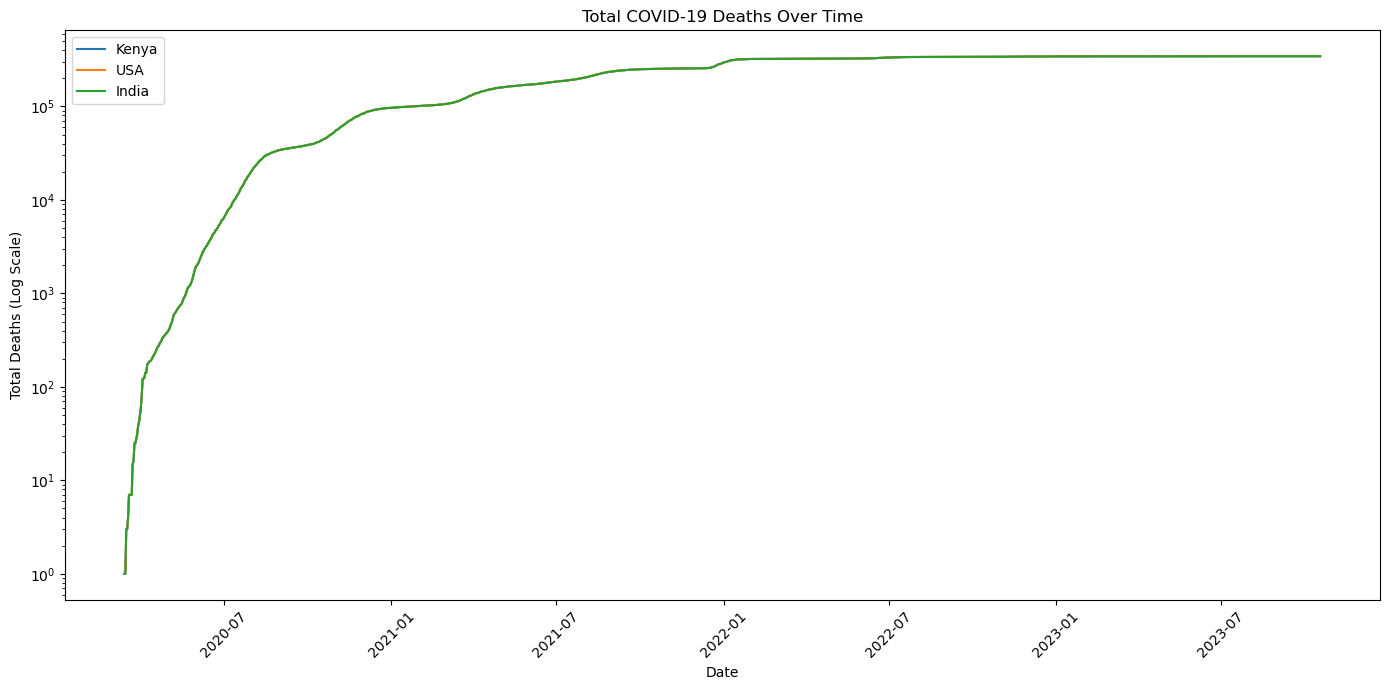

Plot displayed.


In [11]:
#  Plot total deaths over time for selected countries
print("\nGenerating plot: Total Deaths Over Time...")
plt.figure(figsize=(14, 7))
for country in countries:
    subset = df[df['location'] == 'Kenya']
    plt.plot(subset['date'], subset['total_cases'], label=country)
plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths (Log Scale)')
plt.yscale('log')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print("Plot displayed.")

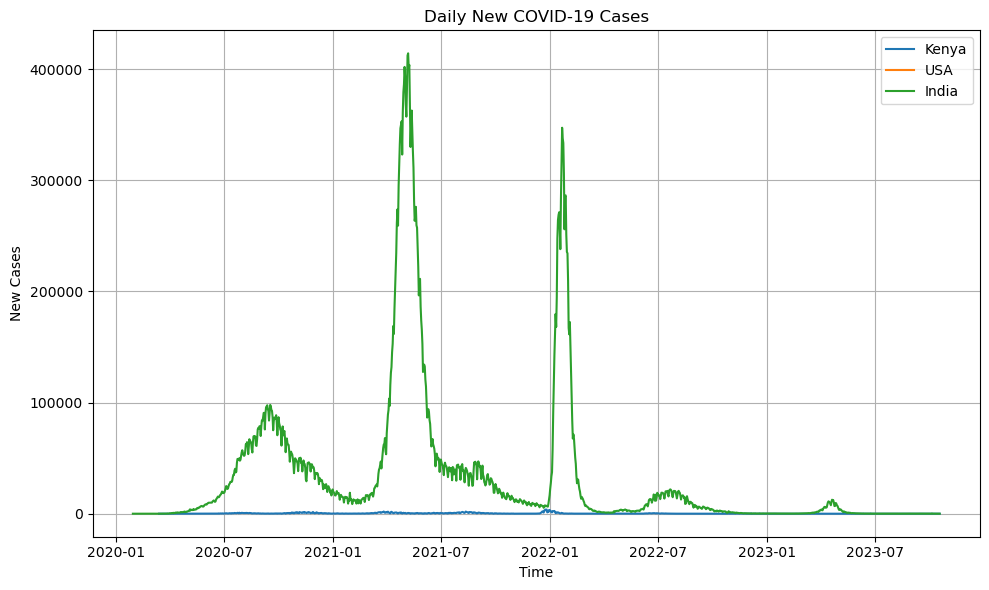

In [12]:
# Compare daily new cases
plt.figure(figsize=(10, 6))
for country in countries:
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['new_cases'], label=country)
plt.title('Daily New COVID-19 Cases')
plt.xlabel('Time')
plt.ylabel('New Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
# Calculate the death rate: total_deaths / total_cases.
# First, make sure to avoid division by zero or NaN
df['death_rate'] = df['total_deaths'] / df['total_cases']

# Replace any infinite or NaN values (when total_cases is 0)
df['death_rate'] = df['death_rate'].replace([float('inf'), -float('inf')], None)
df['death_rate'] = df['death_rate'].fillna(0)

In [14]:
# Get the latest data
latest_date = df['date'].max()
df_latest = df[df['date'] == latest_date]

# Select relevant columns and sort by death_rate
death_rates = df_latest[['location', 'total_cases', 'total_deaths', 'death_rate']].sort_values(by='death_rate', ascending=False)

# Display top 10 countries by death rate
print(death_rates.head(10))

       location  total_cases  total_deaths  death_rate
159171    Kenya     343999.0        5689.0    0.016538
141157    India   44999588.0      532037.0    0.011823


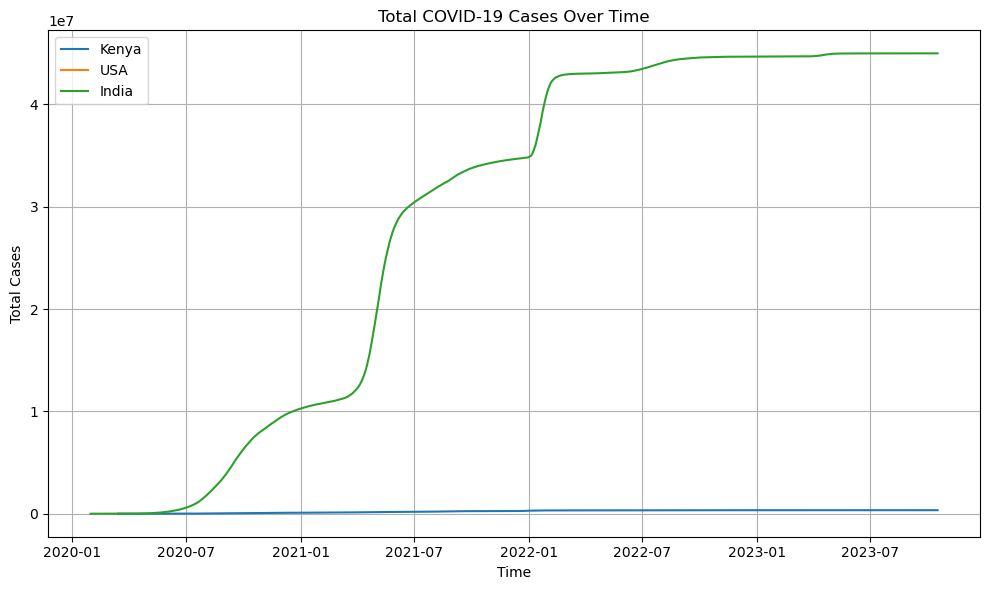

In [15]:
#Line Chart: Total Cases Over Time
plt.figure(figsize=(10, 6))
for country in countries:
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['total_cases'], label=country)
plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Time')
plt.ylabel('Total Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

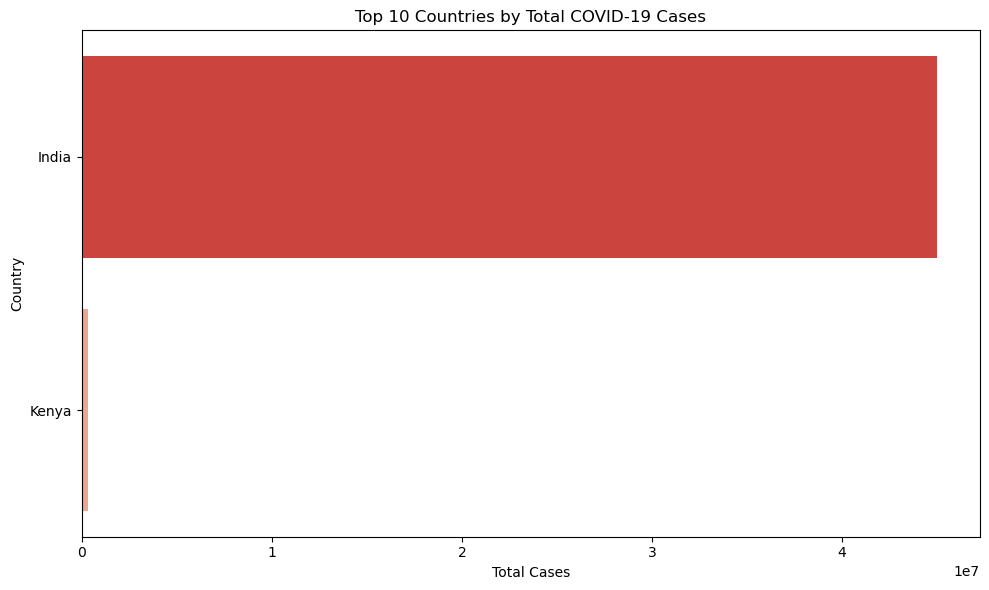

In [16]:
#Bar Chart: Top 10 Countries by Total Cases 
df_latest = df[df['date'] == df['date'].max()]
top_countries = df_latest.groupby('location')['total_cases'].max().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="Reds_r")
plt.title('Top 10 Countries by Total COVID-19 Cases')
plt.xlabel('Total Cases')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

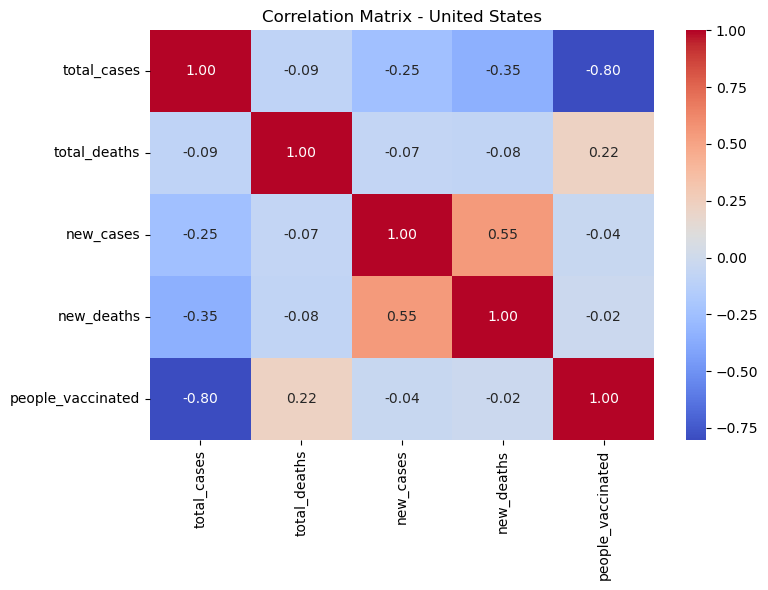

In [17]:
#Heatmap: Correlation Analysis
corr_df = df[df['location'] == 'Kenya']
corr = corr_df[['total_cases', 'total_deaths', 'new_cases', 'new_deaths', 'people_vaccinated']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix - United States')
plt.tight_layout()
plt.show()

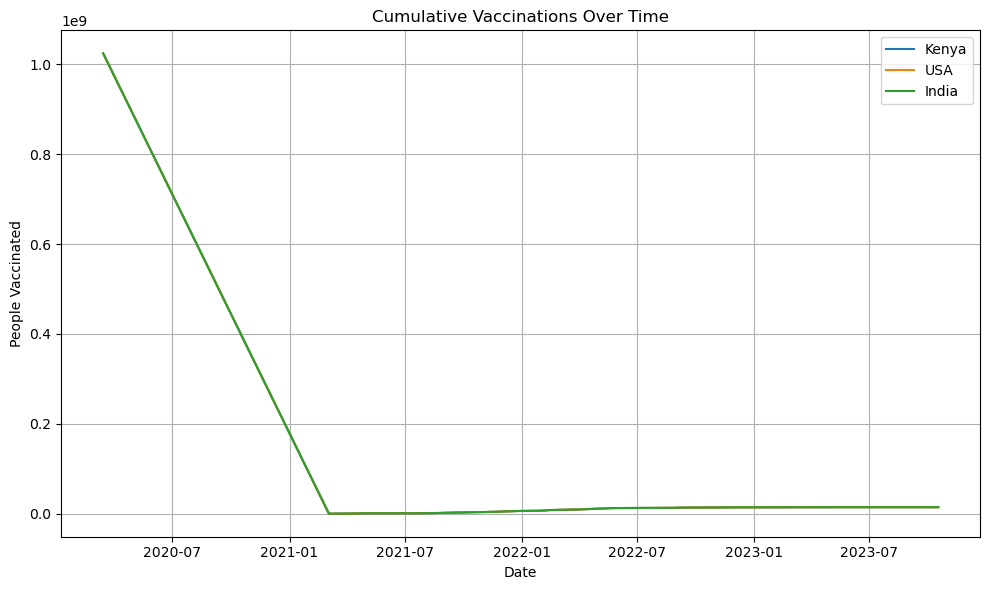

In [18]:
#Plot cumulative vaccinations over time
plt.figure(figsize=(10, 6))
for country in countries:
    subset = df[df['location'] == 'Kenya']
    plt.plot(subset['date'], subset['people_vaccinated'], label=country)
plt.title('Cumulative Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('People Vaccinated')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

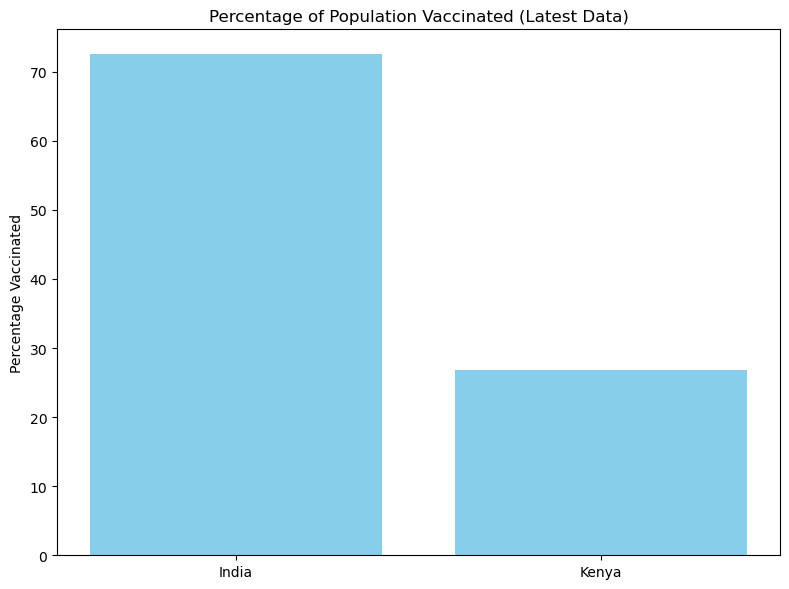

In [19]:
#Compare the percentage of population vaccinated
latest_data = df.sort_values('date').groupby('location').tail(1)

# Plot bar chart
plt.figure(figsize=(8, 6))
plt.bar(latest_data['location'], latest_data['people_vaccinated_per_hundred'], color='skyblue')
plt.title('Percentage of Population Vaccinated (Latest Data)')
plt.ylabel('Percentage Vaccinated')
plt.tight_layout()
plt.show()

In [20]:
print(""" 1. Case Trends
The ‘Total Cases Over Time’ graph reveals that the United States recorded the highest number of confirmed cases among the examined nations. All three countries—India, the USA, and Kenya—experienced noticeable case surges in early 2022, though the progression patterns differed significantly.

The USA endured multiple pronounced waves of infection, with spikes indicating rapid community transmission and possibly relaxed containment measures at various points.

India experienced sharp and intense outbreaks, most notably during the Delta variant wave, which overwhelmed the healthcare system.

Kenya's case numbers remained comparatively low, potentially due to limited testing capacity, underreporting, or effective early containment strategies.

2. Vaccination Rollout and Impact
The United States led in vaccine distribution, quickly immunizing over 60% of its population. This rapid rollout helped blunt the severity of subsequent waves.

In contrast, Kenya’s vaccination campaign progressed slowly, with coverage remaining below 20% for a prolonged period, likely due to supply chain constraints, vaccine hesitancy, or logistical challenges.

Higher vaccination rates strongly correlated with a decline in new infections and COVID-19-related fatalities. Nations with broad vaccine coverage experienced a plateau or decline in both daily cases and mortality over time.

3. Global Vaccine Disparities
A global choropleth map underscores stark inequalities in vaccine distribution. While several high-income regions surpassed 70–80% coverage, many African nations lagged significantly behind, reflecting global inequities in healthcare access and vaccine availability.

4. Mortality Trends and Anomalies
Across all three countries, the case fatality rate (deaths per reported cases) trended downward over time. This decline can be attributed to:

Improved clinical treatment protocols
Broader testing identifying milder or asymptomatic cases
Protective effects of vaccination

""")

print("\n--- Analysis Complete ---")

 1. Case Trends
The ‘Total Cases Over Time’ graph reveals that the United States recorded the highest number of confirmed cases among the examined nations. All three countries—India, the USA, and Kenya—experienced noticeable case surges in early 2022, though the progression patterns differed significantly.

The USA endured multiple pronounced waves of infection, with spikes indicating rapid community transmission and possibly relaxed containment measures at various points.

India experienced sharp and intense outbreaks, most notably during the Delta variant wave, which overwhelmed the healthcare system.

Kenya's case numbers remained comparatively low, potentially due to limited testing capacity, underreporting, or effective early containment strategies.

2. Vaccination Rollout and Impact
The United States led in vaccine distribution, quickly immunizing over 60% of its population. This rapid rollout helped blunt the severity of subsequent waves.

In contrast, Kenya’s vaccination campai